# Video pipeline with Yolo + Resnet Model
### Note 1, For now with dummy throughputs

In [12]:
import os
import pandas as pd
import sys
import yaml
from pprint import PrettyPrinter
pp = PrettyPrinter(indent=4)


# get an absolute path to the directory that contains parent files
project_dir = globals()['_dh'][0]
sys.path.append(os.path.normpath(os.path.join(
    project_dir, '..', '..')))

from experiments.utils.constants import (
    PIPELINE_SIMULATION_CONFIGS_PATH,
    PIPELINE_SIMULATION_RESULTS_PATH
)

series = 103
series_path = os.path.join(
    PIPELINE_SIMULATION_RESULTS_PATH, 'series', str(series))

In [13]:
# load constraints
config_path = os.path.join(
    series_path, f"{0}.yaml")
with open(config_path, 'r') as cf:
    config = yaml.safe_load(cf)
all_states = pd.read_csv(
    os.path.join(series_path, 'all-states.csv'))
with_constraints = pd.read_csv(
    os.path.join(series_path, 'with-constraints.csv'))
# optimal_brute_froce = pd.read_csv(
#     os.path.join(series_path, 'optimal-brute-force.csv'))
# optimal_gurobi = pd.read_csv(
#     os.path.join(series_path, 'optimal-gurobi.csv'))
all_states.columns

Index(['task_0_latency', 'task_0_throughput', 'task_0_throughput_all_replicas',
       'task_0_accuracy', 'task_0_measured', 'task_0_cpu_all_replicas',
       'task_0_gpu_all_replicas', 'task_1_latency', 'task_1_throughput',
       'task_1_throughput_all_replicas', 'task_1_accuracy', 'task_1_measured',
       'task_1_cpu_all_replicas', 'task_1_gpu_all_replicas',
       'pipeline_accuracy', 'pipeline_latency', 'pipeline_throughput',
       'pipeline_cpu', 'pipeline_gpu', 'alpha', 'beta', 'gamma',
       'accuracy_objective', 'resource_objective', 'batch_objective',
       'task_0_variant', 'task_0_cpu', 'task_0_gpu', 'task_0_batch',
       'task_0_replicas', 'task_1_variant', 'task_1_cpu', 'task_1_gpu',
       'task_1_batch', 'task_1_replicas', 'objective'],
      dtype='object')

In [14]:
# HACK
sla = 0.4956369389744915
sla_factor = config['sla_factor']
arrival_rate = config['arrival_rate']
threshold = config['threshold']
sla_partial = sla / sla_factor

sla_factor_1 = 6
new_sla = sla_partial * sla_factor_1

print(f"{threshold = }")
print(f"{sla_factor = }")
print(f"{sla = }")
print(f"{sla_partial = }")
print(f"{arrival_rate = }")
print(f"{new_sla = }")

threshold = 50
sla_factor = 5
sla = 0.4956369389744915
sla_partial = 0.0991273877948983
arrival_rate = 10
new_sla = 0.5947643267693898


In [15]:
selected_stats =[
    'task_0_variant', 'task_0_cpu', 'task_0_batch',
    'task_0_replicas',
    'task_0_latency', 'task_0_throughput', 'task_0_accuracy',
    'task_1_variant', 'task_1_cpu', 'task_1_batch',
    'task_1_replicas',
    'task_1_latency', 'task_1_throughput', 'task_1_accuracy',
    # 'pipeline_accuracy', 'pipeline_latency', 'pipeline_throughput',
    # 'pipeline_cpu',
    'accuracy_objective', 'resource_objective', 'batch_objective', 'objective']

In [16]:
all_states[(all_states['pipeline_latency'] < sla) & (all_states['pipeline_throughput'] > arrival_rate)]

,task_0_latency,task_0_throughput,task_0_throughput_all_replicas,task_0_accuracy,task_0_measured,task_0_cpu_all_replicas,task_0_gpu_all_replicas,task_1_latency,task_1_throughput,task_1_throughput_all_replicas,...,task_0_cpu,task_0_gpu,task_0_batch,task_0_replicas,task_1_variant,task_1_cpu,task_1_gpu,task_1_batch,task_1_replicas,objective
65,0.128834,15.523793,15.523793,0.00,False,1,0,0.144160,13.873454,13.873454,...,1,0,2,1,resnet34,1,0,2,1,-5.75
66,0.128834,15.523793,15.523793,0.00,False,1,0,0.145143,20.669262,20.669262,...,1,0,2,1,resnet34,1,0,3,1,-6.75
67,0.128834,15.523793,15.523793,0.00,False,1,0,0.146126,27.373652,27.373652,...,1,0,2,1,resnet34,1,0,4,1,-7.75
68,0.128834,15.523793,15.523793,0.00,False,1,0,0.147109,33.988455,33.988455,...,1,0,2,1,resnet34,1,0,5,1,-8.75
69,0.128834,15.523793,15.523793,0.00,False,1,0,0.148092,40.515455,40.515455,...,1,0,2,1,resnet34,1,0,6,1,-9.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8191995,0.341544,187.384102,1873.841025,0.25,False,10,0,0.114465,524.177284,5241.772842,...,1,0,64,10,resnet18,1,0,60,10,-143.75
8191996,0.341544,187.384102,1873.841025,0.25,False,10,0,0.114848,531.135409,5311.354093,...,1,0,64,10,resnet18,1,0,61,10,-144.75
8191997,0.341544,187.384102,1873.841025,0.25,False,10,0,0.115232,538.047255,5380.472547,...,1,0,64,10,resnet18,1,0,62,10,-145.75
8191998,0.341544,187.384102,1873.841025,0.25,False,10,0,0.115615,544.913281,5449.132806,...,1,0,64,10,resnet18,1,0,63,10,-146.75


In [17]:
batch = 1
single_batch = all_states[(all_states['task_0_batch'] == batch) & (all_states['task_1_batch'] == batch)]
single_batch

,task_0_latency,task_0_throughput,task_0_throughput_all_replicas,task_0_accuracy,task_0_measured,task_0_cpu_all_replicas,task_0_gpu_all_replicas,task_1_latency,task_1_throughput,task_1_throughput_all_replicas,...,task_0_cpu,task_0_gpu,task_0_batch,task_0_replicas,task_1_variant,task_1_cpu,task_1_gpu,task_1_batch,task_1_replicas,objective
0,0.128393,7.788569,7.788569,0.0,False,1,0,0.143177,6.984345,6.984345,...,1,0,1,1,resnet34,1,0,1,1,-3.75
4096,0.128393,7.788569,7.788569,0.0,False,1,0,0.143177,6.984345,13.968690,...,1,0,1,1,resnet34,1,0,1,2,-4.75
8192,0.128393,7.788569,7.788569,0.0,False,1,0,0.143177,6.984345,20.953035,...,1,0,1,1,resnet34,1,0,1,3,-5.75
12288,0.128393,7.788569,7.788569,0.0,False,1,0,0.143177,6.984345,27.937381,...,1,0,1,1,resnet34,1,0,1,4,-6.75
16384,0.128393,7.788569,7.788569,0.0,False,1,0,0.143177,6.984345,34.921726,...,1,0,1,1,resnet34,1,0,1,5,-7.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10219520,0.529490,1.888611,18.886106,0.5,False,10,0,0.091856,10.886656,65.319938,...,1,0,1,10,resnet18,1,0,1,6,-17.50
10223616,0.529490,1.888611,18.886106,0.5,False,10,0,0.091856,10.886656,76.206594,...,1,0,1,10,resnet18,1,0,1,7,-18.50
10227712,0.529490,1.888611,18.886106,0.5,False,10,0,0.091856,10.886656,87.093250,...,1,0,1,10,resnet18,1,0,1,8,-19.50
10231808,0.529490,1.888611,18.886106,0.5,False,10,0,0.091856,10.886656,97.979906,...,1,0,1,10,resnet18,1,0,1,9,-20.50


## Motivating One
Few Users -> low load \
high accuracy, high latency requirement -> cheaper models


load = 40
new_sla = 0.2973821633846949


,task_0_latency,task_0_throughput,task_0_throughput_all_replicas,task_0_accuracy,task_0_measured,task_0_cpu_all_replicas,task_0_gpu_all_replicas,task_1_latency,task_1_throughput,task_1_throughput_all_replicas,...,task_0_cpu,task_0_gpu,task_0_batch,task_0_replicas,task_1_variant,task_1_cpu,task_1_gpu,task_1_batch,task_1_replicas,objective
225280,0.128393,7.788569,46.731416,0.0,False,6,0,0.143177,6.984345,41.906071,...,1,0,1,6,resnet34,1,0,1,6,-13.75
229376,0.128393,7.788569,46.731416,0.0,False,6,0,0.143177,6.984345,48.890416,...,1,0,1,6,resnet34,1,0,1,7,-14.75
233472,0.128393,7.788569,46.731416,0.0,False,6,0,0.143177,6.984345,55.874761,...,1,0,1,6,resnet34,1,0,1,8,-15.75
237568,0.128393,7.788569,46.731416,0.0,False,6,0,0.143177,6.984345,62.859106,...,1,0,1,6,resnet34,1,0,1,9,-16.75
241664,0.128393,7.788569,46.731416,0.0,False,6,0,0.143177,6.984345,69.843452,...,1,0,1,6,resnet34,1,0,1,10,-17.75
266240,0.128393,7.788569,54.519985,0.0,False,7,0,0.143177,6.984345,41.906071,...,1,0,1,7,resnet34,1,0,1,6,-14.75
270336,0.128393,7.788569,54.519985,0.0,False,7,0,0.143177,6.984345,48.890416,...,1,0,1,7,resnet34,1,0,1,7,-15.75
274432,0.128393,7.788569,54.519985,0.0,False,7,0,0.143177,6.984345,55.874761,...,1,0,1,7,resnet34,1,0,1,8,-16.75
278528,0.128393,7.788569,54.519985,0.0,False,7,0,0.143177,6.984345,62.859106,...,1,0,1,7,resnet34,1,0,1,9,-17.75
282624,0.128393,7.788569,54.519985,0.0,False,7,0,0.143177,6.984345,69.843452,...,1,0,1,7,resnet34,1,0,1,10,-18.75


/home/cc/miniconda3/envs/central/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='accuracy_objective', ylabel='resource_objective'>

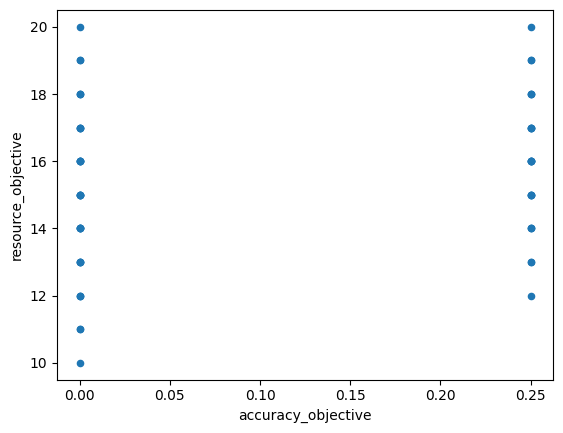

In [19]:
sla_factor_1 = 3
load = 40
new_sla = sla_partial * sla_factor_1

case_1 = single_batch[(single_batch['pipeline_latency'] < new_sla) & (single_batch['pipeline_throughput'] > load)]

print(f"{load = }")
print(f"{new_sla = }")
display(case_1)
case_1.plot.scatter(x='accuracy_objective', y='resource_objective')

## Motivating Two
Few Users -> low load \
high accuracy, low latency requirement -> cheaper models \
low accuracy, high latency requirement -> heavier models

load = 50
new_sla = 0.49563693897449146


,task_0_latency,task_0_throughput,task_0_throughput_all_replicas,task_0_accuracy,task_0_measured,task_0_cpu_all_replicas,task_0_gpu_all_replicas,task_1_latency,task_1_throughput,task_1_throughput_all_replicas,...,task_0_cpu,task_0_gpu,task_0_batch,task_0_replicas,task_1_variant,task_1_cpu,task_1_gpu,task_1_batch,task_1_replicas,objective
274432,0.128393,7.788569,54.519985,0.0,False,7,0,0.143177,6.984345,55.874761,...,1,0,1,7,resnet34,1,0,1,8,-16.75
278528,0.128393,7.788569,54.519985,0.0,False,7,0,0.143177,6.984345,62.859106,...,1,0,1,7,resnet34,1,0,1,9,-17.75
282624,0.128393,7.788569,54.519985,0.0,False,7,0,0.143177,6.984345,69.843452,...,1,0,1,7,resnet34,1,0,1,10,-18.75
315392,0.128393,7.788569,62.308554,0.0,False,8,0,0.143177,6.984345,55.874761,...,1,0,1,8,resnet34,1,0,1,8,-17.75
319488,0.128393,7.788569,62.308554,0.0,False,8,0,0.143177,6.984345,62.859106,...,1,0,1,8,resnet34,1,0,1,9,-18.75
323584,0.128393,7.788569,62.308554,0.0,False,8,0,0.143177,6.984345,69.843452,...,1,0,1,8,resnet34,1,0,1,10,-19.75
356352,0.128393,7.788569,70.097124,0.0,False,9,0,0.143177,6.984345,55.874761,...,1,0,1,9,resnet34,1,0,1,8,-18.75
360448,0.128393,7.788569,70.097124,0.0,False,9,0,0.143177,6.984345,62.859106,...,1,0,1,9,resnet34,1,0,1,9,-19.75
364544,0.128393,7.788569,70.097124,0.0,False,9,0,0.143177,6.984345,69.843452,...,1,0,1,9,resnet34,1,0,1,10,-20.75
397312,0.128393,7.788569,77.885693,0.0,False,10,0,0.143177,6.984345,55.874761,...,1,0,1,10,resnet34,1,0,1,8,-19.75


/home/cc/miniconda3/envs/central/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='accuracy_objective', ylabel='task_0_replicas'>

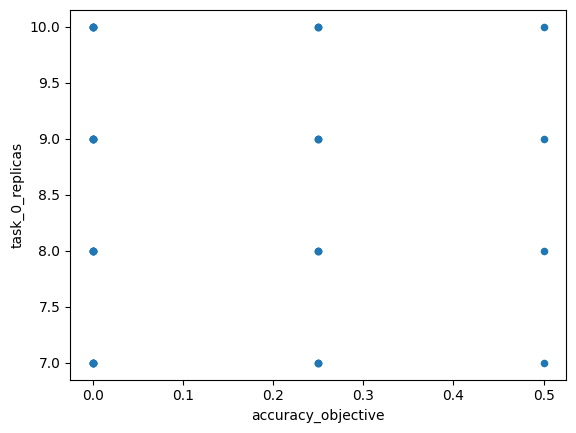

In [20]:
sla_factor_1 = 5
load = 50
new_sla = sla_partial * sla_factor_1

case_1 = single_batch[(single_batch['pipeline_latency'] < new_sla) & (single_batch['pipeline_throughput'] > load)]

print(f"{load = }")
print(f"{new_sla = }")
display(case_1)
case_1.plot.scatter(x='accuracy_objective', y='task_0_replicas')

load = 50
new_sla = 0.2973821633846949


,task_0_latency,task_0_throughput,task_0_throughput_all_replicas,task_0_accuracy,task_0_measured,task_0_cpu_all_replicas,task_0_gpu_all_replicas,task_1_latency,task_1_throughput,task_1_throughput_all_replicas,...,task_0_cpu,task_0_gpu,task_0_batch,task_0_replicas,task_1_variant,task_1_cpu,task_1_gpu,task_1_batch,task_1_replicas,objective
274432,0.128393,7.788569,54.519985,0.0,False,7,0,0.143177,6.984345,55.874761,...,1,0,1,7,resnet34,1,0,1,8,-16.75
278528,0.128393,7.788569,54.519985,0.0,False,7,0,0.143177,6.984345,62.859106,...,1,0,1,7,resnet34,1,0,1,9,-17.75
282624,0.128393,7.788569,54.519985,0.0,False,7,0,0.143177,6.984345,69.843452,...,1,0,1,7,resnet34,1,0,1,10,-18.75
315392,0.128393,7.788569,62.308554,0.0,False,8,0,0.143177,6.984345,55.874761,...,1,0,1,8,resnet34,1,0,1,8,-17.75
319488,0.128393,7.788569,62.308554,0.0,False,8,0,0.143177,6.984345,62.859106,...,1,0,1,8,resnet34,1,0,1,9,-18.75
323584,0.128393,7.788569,62.308554,0.0,False,8,0,0.143177,6.984345,69.843452,...,1,0,1,8,resnet34,1,0,1,10,-19.75
356352,0.128393,7.788569,70.097124,0.0,False,9,0,0.143177,6.984345,55.874761,...,1,0,1,9,resnet34,1,0,1,8,-18.75
360448,0.128393,7.788569,70.097124,0.0,False,9,0,0.143177,6.984345,62.859106,...,1,0,1,9,resnet34,1,0,1,9,-19.75
364544,0.128393,7.788569,70.097124,0.0,False,9,0,0.143177,6.984345,69.843452,...,1,0,1,9,resnet34,1,0,1,10,-20.75
397312,0.128393,7.788569,77.885693,0.0,False,10,0,0.143177,6.984345,55.874761,...,1,0,1,10,resnet34,1,0,1,8,-19.75


/home/cc/miniconda3/envs/central/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='accuracy_objective', ylabel='task_0_replicas'>

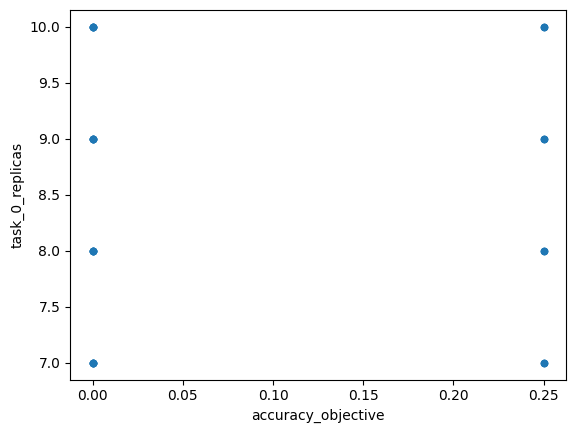

In [21]:
sla_factor_1 = 3
load = 50
new_sla = sla_partial * sla_factor_1

case_1 = single_batch[(single_batch['pipeline_latency'] < new_sla) & (single_batch['pipeline_throughput'] > load)]

print(f"{load = }")
print(f"{new_sla = }")
display(case_1)
case_1.plot.scatter(x='accuracy_objective', y='task_0_replicas')

In [22]:
all_states[['task_0_variant', 'task_0_cpu']].drop_duplicates()

,task_0_variant,task_0_cpu
0,yolov5n,1
2048000,yolov5l,2
4096000,yolov5x,4
6144000,yolov5s,1
8192000,yolov5m,1


In [23]:
all_states[(all_states['task_0_replicas'] == 1) & (all_states['task_0_batch'] == 64)][['task_0_variant', 'task_0_throughput', 'task_0_cpu']].drop_duplicates()

,task_0_variant,task_0_throughput,task_0_cpu
4032,yolov5n,409.759258,1
2052032,yolov5l,71.749464,2
4100032,yolov5x,70.260351,4
6148032,yolov5s,187.384102,1
8196032,yolov5m,75.207688,1


In [24]:
import os
import sys
from pprint import PrettyPrinter
pp = PrettyPrinter(indent=4)

# get an absolute path to the directory that contains parent files
project_dir = globals()['_dh'][0]
sys.path.append(os.path.normpath(os.path.join(
    project_dir, '..', '..', '..', '..')))

from experiments.utils.constants import (
    NODE_PROFILING_RESULTS_PATH
)
from experiments.utils.parser import Parser
series = 72
experiment_id = 1
config_key_mapper = "key_config_mapper.csv"
model_name = 'resnet-human'
series_path = os.path.join(
    NODE_PROFILING_RESULTS_PATH,
    'series',
    str(series))
loader = Loader(
    series_path=series_path, config_key_mapper=config_key_mapper,
    model_name=model_name)
results = loader.result_processing()
key_config_df = loader.key_config_mapper()
experiment_ids = key_config_df['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size', 'cpu_request', 'load']
results_columns = ['throughput_max']
resnet_throughputs = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
# output['expected_throughput'] = 1/output['model_latencies_avg'] * output['max_batch_size']
# output.sort_values(by='throughput')
display(resnet_throughputs)

,model_variant,max_batch_size,cpu_request,load,throughput_max
0,resnet18,1,1,1,1.000000
1,resnet18,1,1,10,9.959667
2,resnet18,1,1,20,17.651515
3,resnet18,1,2,1,0.983051
4,resnet18,1,2,10,10.000000
...,...,...,...,...,...
289,resnet152,64,2,1,0.841565
290,resnet152,64,4,1,0.566288
291,resnet152,64,4,10,9.712374
292,resnet152,64,8,1,0.738587


In [25]:
import os
import sys
from pprint import PrettyPrinter
pp = PrettyPrinter(indent=4)

# get an absolute path to the directory that contains parent files
project_dir = globals()['_dh'][0]
sys.path.append(os.path.normpath(os.path.join(
    project_dir, '..', '..', '..', '..')))

from experiments.utils.constants import (
    NODE_PROFILING_RESULTS_PATH
)
from experiments.utils.parser import Parser
series = 71
experiment_id = 1
config_key_mapper = "key_config_mapper.csv"
model_name = 'yolo'
series_path = os.path.join(
    NODE_PROFILING_RESULTS_PATH,
    'series',
    str(series))
loader = Loader(
    series_path=series_path, config_key_mapper=config_key_mapper,
    model_name=model_name)
results = loader.result_processing()
key_config_df = loader.key_config_mapper()
experiment_ids = key_config_df['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size', 'cpu_request', 'load']
results_columns = ['throughput_max']
yolo_throughputs = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
# output['expected_throughput'] = 1/output['model_latencies_avg'] * output['max_batch_size']
# output.sort_values(by='throughput')
display(yolo_throughputs)

,model_variant,max_batch_size,cpu_request,load,throughput_max
0,yolov5n,1,1,1,0.983333
1,yolov5n,1,1,10,10.000000
2,yolov5n,1,1,20,15.076923
3,yolov5n,1,2,1,0.983051
4,yolov5n,1,2,10,10.000000
...,...,...,...,...,...
295,yolov5x,64,4,10,2.508973
296,yolov5x,64,4,20,2.652307
297,yolov5x,64,8,1,0.983051
298,yolov5x,64,8,10,3.944097


In [26]:
yolo_batch_sizes = yolo_throughputs['max_batch_size'].unique()
resnet_batch_sizes = resnet_throughputs['max_batch_size'].unique()
consistant_stat = all_states[all_states['task_0_batch'].isin(yolo_batch_sizes) & all_states['task_1_batch'].isin(resnet_batch_sizes)]

In [27]:
consistant_stat

,task_0_latency,task_0_throughput,task_0_throughput_all_replicas,task_0_accuracy,task_0_measured,task_0_cpu_all_replicas,task_0_gpu_all_replicas,task_1_latency,task_1_throughput,task_1_throughput_all_replicas,...,task_0_cpu,task_0_gpu,task_0_batch,task_0_replicas,task_1_variant,task_1_cpu,task_1_gpu,task_1_batch,task_1_replicas,objective
0,0.128393,7.788569,7.788569,0.0,False,1,0,0.143177,6.984345,6.984345,...,1,0,1,1,resnet34,1,0,1,1,-3.75
1,0.128393,7.788569,7.788569,0.0,False,1,0,0.144160,13.873454,13.873454,...,1,0,1,1,resnet34,1,0,2,1,-4.75
7,0.128393,7.788569,7.788569,0.0,False,1,0,0.150057,53.312950,53.312950,...,1,0,1,1,resnet34,1,0,8,1,-10.75
31,0.128393,7.788569,7.788569,0.0,False,1,0,0.173646,184.283038,184.283038,...,1,0,1,1,resnet34,1,0,32,1,-34.75
63,0.128393,7.788569,7.788569,0.0,False,1,0,0.205097,312.046896,312.046896,...,1,0,1,1,resnet34,1,0,64,1,-66.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10239936,0.850977,75.207688,752.076884,0.5,False,10,0,0.091856,10.886656,108.866563,...,1,0,64,10,resnet18,1,0,1,10,-84.50
10239937,0.850977,75.207688,752.076884,0.5,False,10,0,0.092239,21.682854,216.828538,...,1,0,64,10,resnet18,1,0,2,10,-85.50
10239943,0.850977,75.207688,752.076884,0.5,False,10,0,0.094538,84.622008,846.220084,...,1,0,64,10,resnet18,1,0,8,10,-91.50
10239967,0.850977,75.207688,752.076884,0.5,False,10,0,0.103735,308.477895,3084.778954,...,1,0,64,10,resnet18,1,0,32,10,-115.50


In [28]:
batch_sizes = yolo_throughputs['max_batch_size'].unique()
batch_sizes

array([ 1,  2,  8, 32, 64])

In [29]:
# HERE
# 1. decide on the base allocation from the per model throughput dataframes
# 2. join them to the original dataframe
# 3. repeat former experiments

In [30]:
# threshold
threshold = 20

In [43]:
resnet_throughputs[resnet_throughputs['load'] == '20'].head(20)

,model_variant,max_batch_size,cpu_request,load,throughput_max
2,resnet18,1,1,20,17.651515
5,resnet18,1,2,20,20.000000
8,resnet18,1,4,20,19.911333
11,resnet18,1,8,20,19.974000
14,resnet18,2,1,20,19.988737
17,resnet18,2,2,20,19.966102
20,resnet18,2,4,20,20.000000
23,resnet18,2,8,20,19.962570
26,resnet18,8,1,20,19.976630
29,resnet18,8,2,20,19.997357


In [48]:
yolo_throughputs[yolo_throughputs['load'] == 20]

,model_variant,max_batch_size,cpu_request,load,throughput_max
2,yolov5n,1,1,20,15.076923
5,yolov5n,1,2,20,17.991585
8,yolov5n,1,4,20,20.000000
11,yolov5n,1,8,20,20.016949
14,yolov5n,2,1,20,14.168675
...,...,...,...,...,...
287,yolov5x,32,8,20,4.152255
290,yolov5x,64,1,20,0.788958
293,yolov5x,64,2,20,1.264240
296,yolov5x,64,4,20,2.652307
